# 基于东易日盛行情数据的基本分布分析
> v0.1
> 
> 20160414
> 
> 主要是涨幅和价格的分析

导入模块

In [15]:
import tushare as ts
import pylab
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
code='002713'

### 获得基础信息

In [2]:
bi=ts.get_stock_basics()
name=bi.ix[code].name
st=bi.ix[code].timeToMarket
st=str(st)
starttime=st[:4]+'-'+st[4:6]+'-'+st[6:8]
bi.ix[code]

name                    东易日盛
industry                装修装饰
area                      北京
pe                         0
outstanding          6241.31
totals               24968.1
totalAssets           192768
liquidAssets          136492
fixedAssets          11343.5
reserved               39289
reservedPerShare        1.57
esp                    -0.14
bvps                    3.32
pb                     10.34
timeToMarket        20140219
Name: 002713, dtype: object

### 获得近三年的日线数据

In [3]:
dp=ts.get_hist_data(code)
dp[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-04-20,34.55,34.79,30.94,30.90,44632.06,-3.39,-9.88,34.176,34.758,35.500,25597.41,33473.43,44759.36,7.15
2016-04-19,34.45,34.77,34.33,34.03,14198.56,0.21,0.61,35.104,35.373,35.823,26166.62,34146.46,45172.48,2.27
2016-04-18,35.29,35.29,34.12,34.03,20265.69,-1.18,-3.34,35.518,35.609,36.012,32395.44,37845.19,49147.84,3.25
2016-04-15,36.30,36.30,35.30,34.98,23291.18,-0.89,-2.46,35.702,35.663,36.242,33653.06,39608.41,52451.88,3.73
2016-04-14,35.75,36.38,36.19,35.35,25599.58,0.61,1.71,35.446,35.633,36.237,38574.11,42708.29,55010.57,4.10


### 获得涨幅数据列，并绘制涨幅分布图

最小值： -10.02
最大值： 44.0
平均值： 0.324809160305
标准差： 4.90875112741


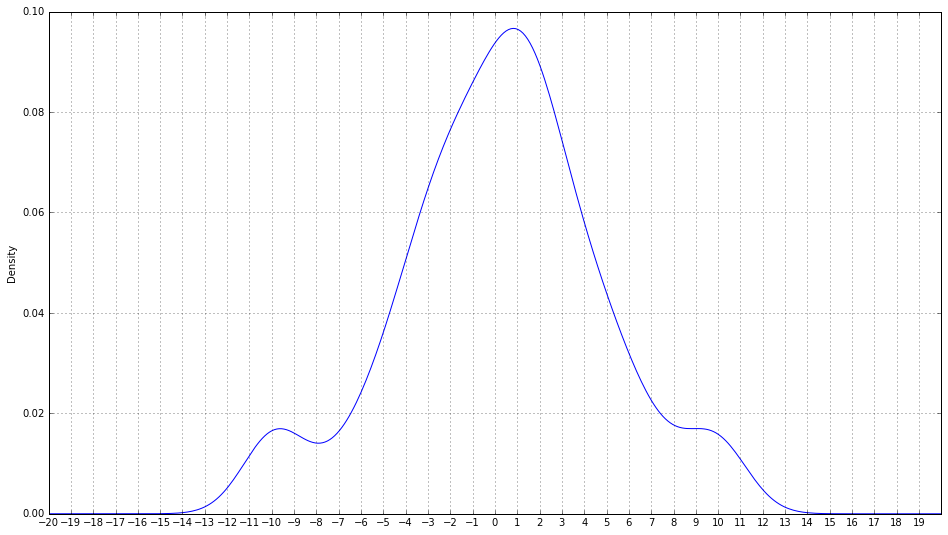

In [4]:
pc=dp.p_change
pxt=np.arange(-20,20,1)
pxl=[-20,20]
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc.min()
print '最大值：',pc.max()
print '平均值：',pc.mean()
print '标准差：',pc.std()

-  

-  

### 近20日的涨幅数据及分布图

最小值： -9.88
最大值： 5.86
平均值： -0.861
标准差： 4.14544125008


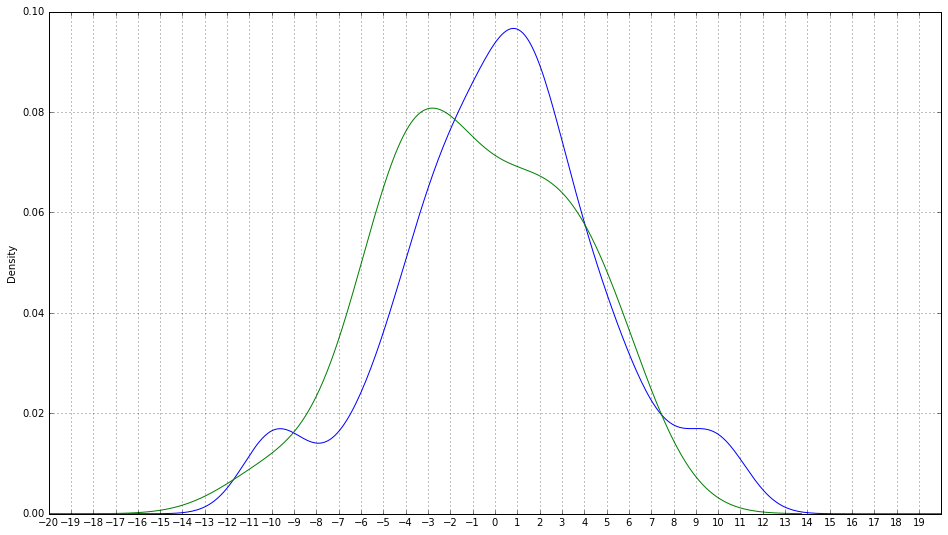

In [5]:
pc20=dp[:20].p_change
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
pc20.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc20.min()
print '最大值：',pc20.max()
print '平均值：',pc20.mean()
print '标准差：',pc20.std()

- 根据月内数据与三年数据的比较，判断近期行情的重心

### 分析三年数据的收盘价分布情况

最小值： 14.0
最大值： 88.81
平均值： 36.5645992366
标准差： 11.5747195859


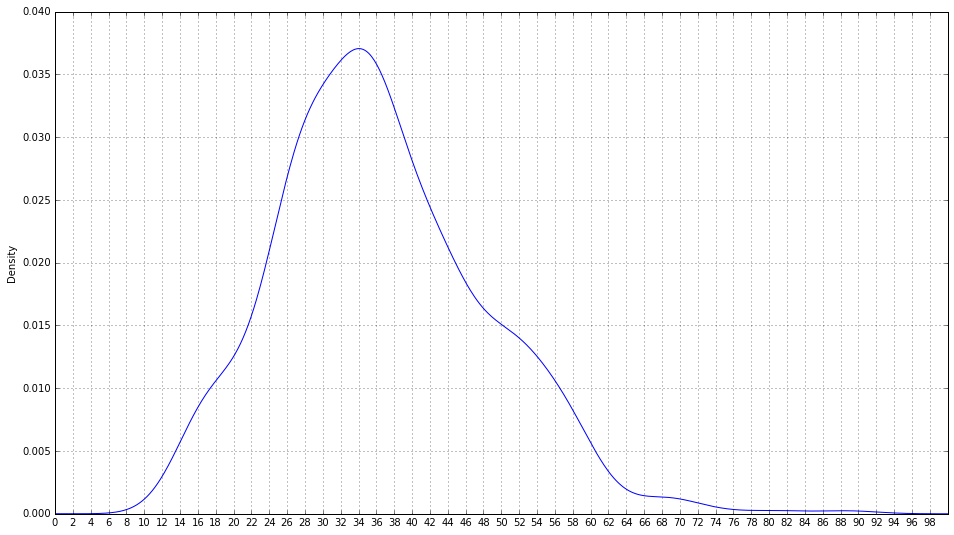

In [6]:
close=dp.close
cxt=np.arange(0,100,2)
cxl=[0,100]
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close.min()
print '最大值：',close.max()
print '平均值：',close.mean()
print '标准差：',close.std()

- 此图基本反应了 

 - 

 -  

近20日收盘价分布情况对比

最小值： 30.94
最大值： 37.95
平均值： 35.4995
标准差： 1.55111326744


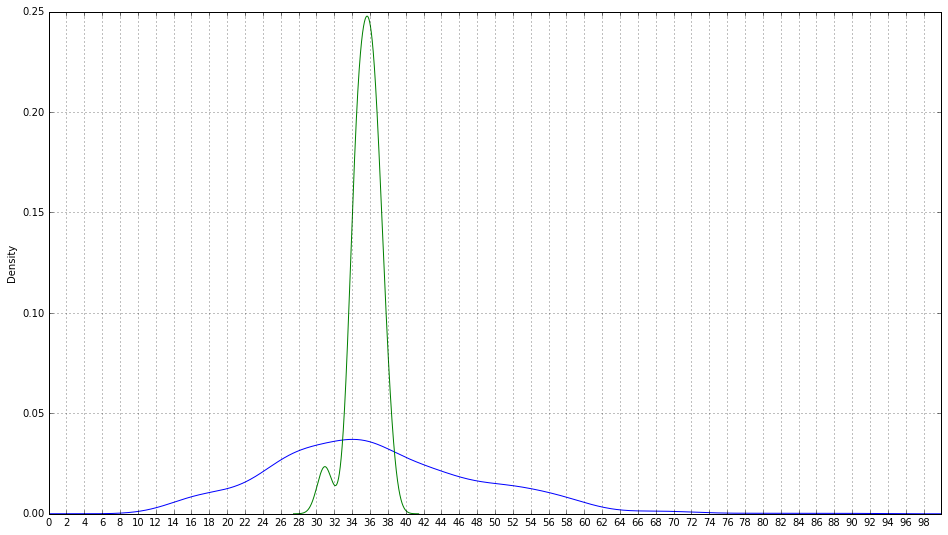

In [7]:
close20=dp[:20].close
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
close20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close20.min()
print '最大值：',close20.max()
print '平均值：',close20.mean()
print '标准差：',close20.std()

近20日的收盘价数据与三年数据的对比，判断目前价格位置

### 对全部数据的收盘价分析

#### 获取全部数据

前复权数据

In [16]:
dfqfq=ts.get_h_data(code,start=starttime) 
dfqfq[:5]

[Getting data:]#########

,open,high,close,low,volume,amount
date,,,,,,
2016-04-20,34.55,34.79,30.94,30.90,4463206,143625296
2016-04-19,34.45,34.77,34.33,34.03,1419856,48714084
2016-04-18,35.29,35.29,34.12,34.03,2026569,69437176
2016-04-15,36.30,36.30,35.30,34.98,2329118,82469576
2016-04-14,35.75,36.38,36.19,35.35,2559958,91733352


简单分析

In [9]:
dfqfq.describe()

,open,high,close,low,volume,amount
count,522.000000,522.000000,522.00000,522.000000,522.000000,5.220000e+02
mean,24.022165,24.862912,24.13772,23.301303,2778486.049808,9.755272e+07
std,7.870034,8.244498,7.88439,7.397312,2342402.420207,9.569618e+07
min,12.330000,14.080000,13.81000,12.330000,244741.000000,8.738151e+06
25%,17.910000,18.372500,18.01500,17.567500,1195662.750000,4.303967e+07
50%,22.205000,22.975000,22.33500,21.515000,2098701.000000,7.192930e+07
75%,27.610000,28.720000,27.82750,26.597500,3699267.500000,1.207048e+08
max,54.550000,57.600000,55.10000,51.510000,20962340.000000,9.429279e+08


除权数据

In [10]:
df=ts.get_h_data(code,start=starttime,autype='None') 
df[:5]

[Getting data:]#########

,open,high,close,low,volume,amount
date,,,,,,
2016-04-20,34.55,34.79,30.94,30.90,4463206,143625296
2016-04-19,34.45,34.77,34.33,34.03,1419856,48714084
2016-04-18,35.29,35.29,34.12,34.03,2026569,69437176
2016-04-15,36.30,36.30,35.30,34.98,2329118,82469576
2016-04-14,35.75,36.38,36.19,35.35,2559958,91733352


简单分析

In [11]:
df.describe()

,open,high,close,low,volume,amount
count,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,36.379981,37.558851,36.558084,35.380613,2778486.049808,9.755272e+07
std,11.411233,11.730432,11.522408,11.074639,2342402.420207,9.569618e+07
min,14.230000,15.400000,14.000000,13.980000,244741.000000,8.738151e+06
25%,28.180000,29.400000,28.515000,27.272500,1195662.750000,4.303967e+07
50%,35.180000,36.180000,35.205000,34.470000,2098701.000000,7.192930e+07
75%,43.365000,44.280000,43.440000,42.277500,3699267.500000,1.207048e+08
max,83.770000,88.770000,88.770000,80.410000,20962340.000000,9.429279e+08


#### 收盘价分析

前复权收盘价分析

 
最小值： 13.81
最大值： 55.1
平均值： 24.1377203065
标准差： 7.8843897848


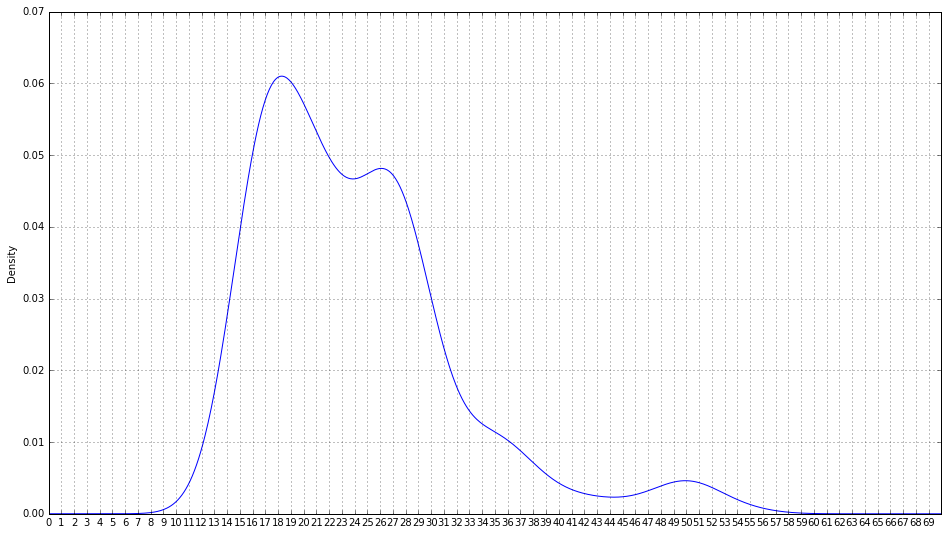

In [12]:
closeallqfq=dfqfq.close
qxt=np.arange(0,70,1)
qxl=[0,70]
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
print ' '
print '最小值：',closeallqfq.min()
print '最大值：',closeallqfq.max()
print '平均值：',closeallqfq.mean()
print '标准差：',closeallqfq.std()

- 数据是前复权数据，因此最大值和最小值都向下滑动了。特点为：

 -  
 
  -  

与20日收盘价对比

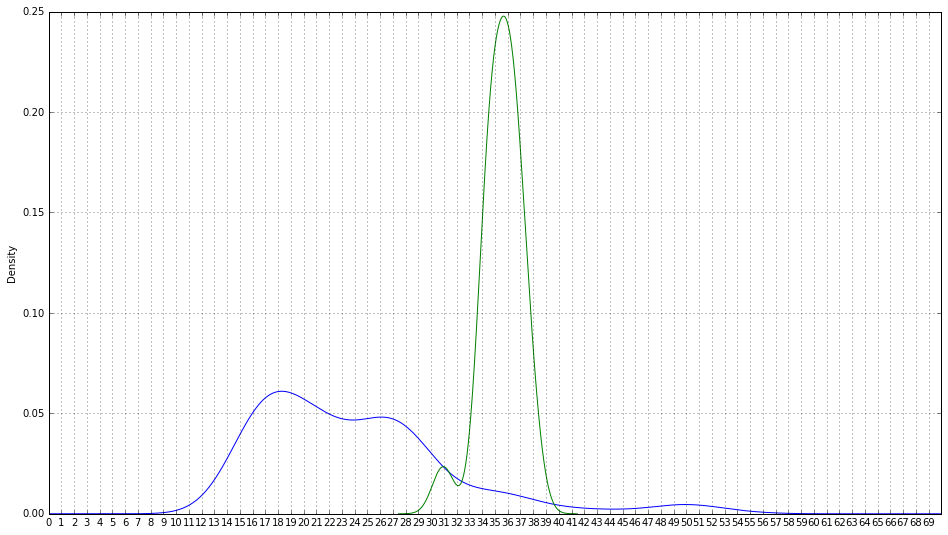

In [13]:
closeallqfq20=dfqfq[:20].close
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
closeallqfq20.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)

上涨概率简单分析

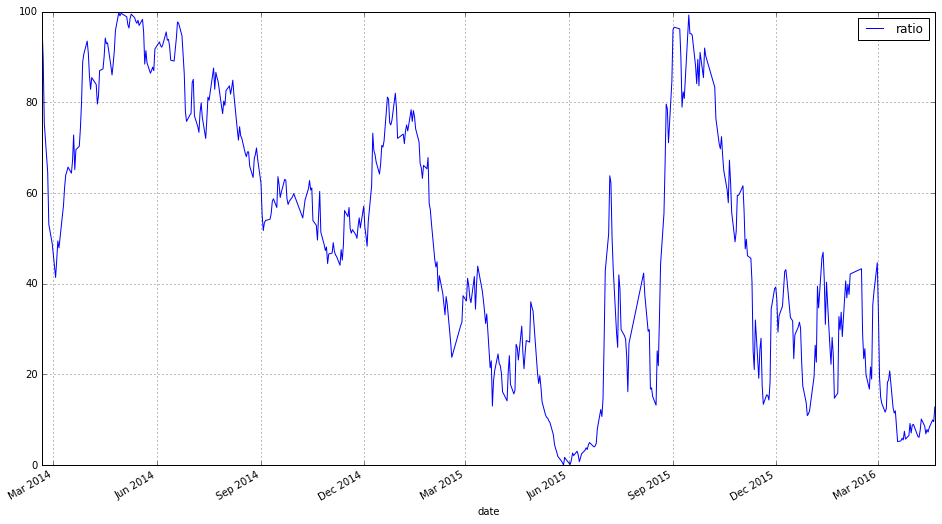

In [17]:
qfqrat=pd.DataFrame([100-stats.percentileofscore(dfqfq.close,f) for f in dfqfq.close],index=dfqfq.index,columns=['ratio'])
qfqrat.plot(grid=True,figsize=(16,9))

收盘价比对

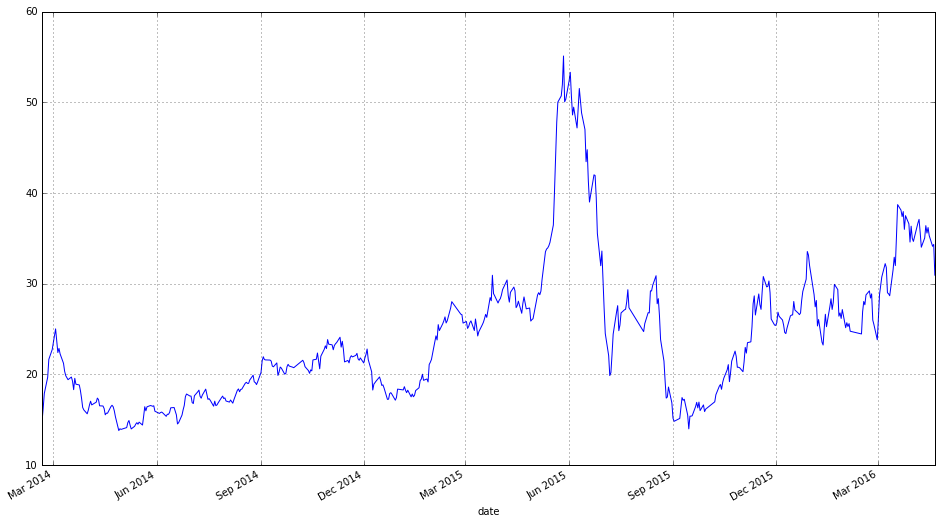

In [18]:
dfqfq.close.plot(grid=True,figsize=(16,9))

除权数据收盘价分析

最小值： 14.0
最大值： 88.77
平均值： 36.5580842912
标准差： 11.5224080514


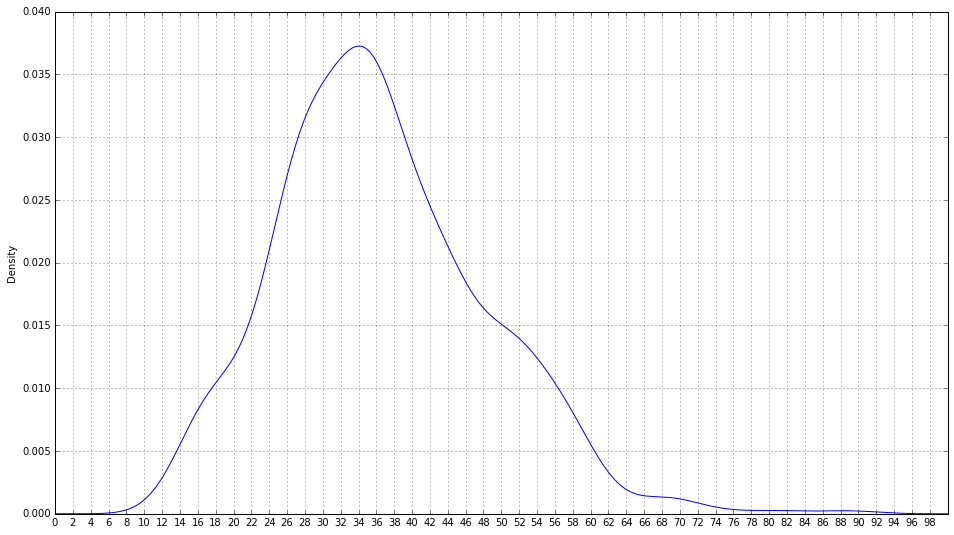

In [19]:
closeall=df.close
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',closeall.min()
print '最大值：',closeall.max()
print '平均值：',closeall.mean()
print '标准差：',closeall.std()

- 除权数据的分析中，价格范围相比三年数据扩大不多。特点为：

 -  
 
 -  
 
  -  

与20日收盘价对比

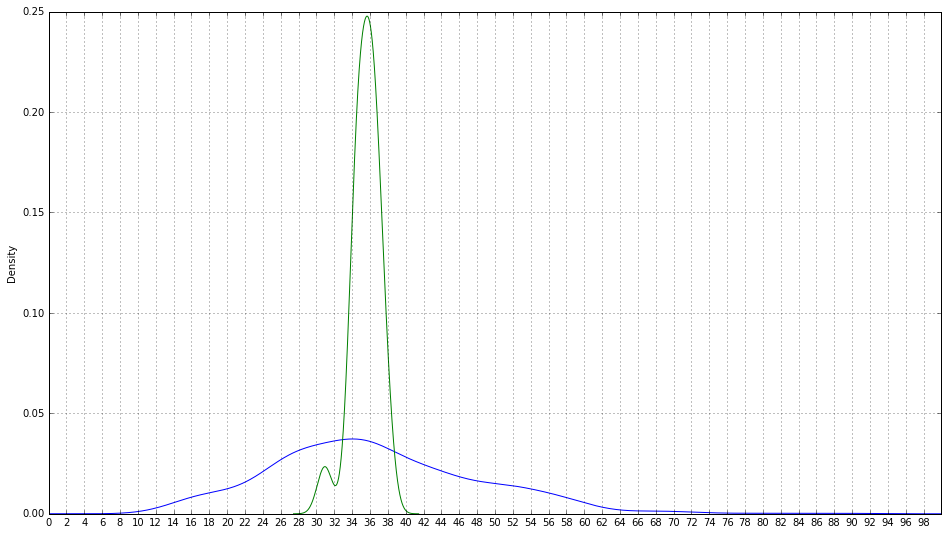

In [20]:
closeall20=df[:20].close
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
closeall20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)

上涨概率简单分析

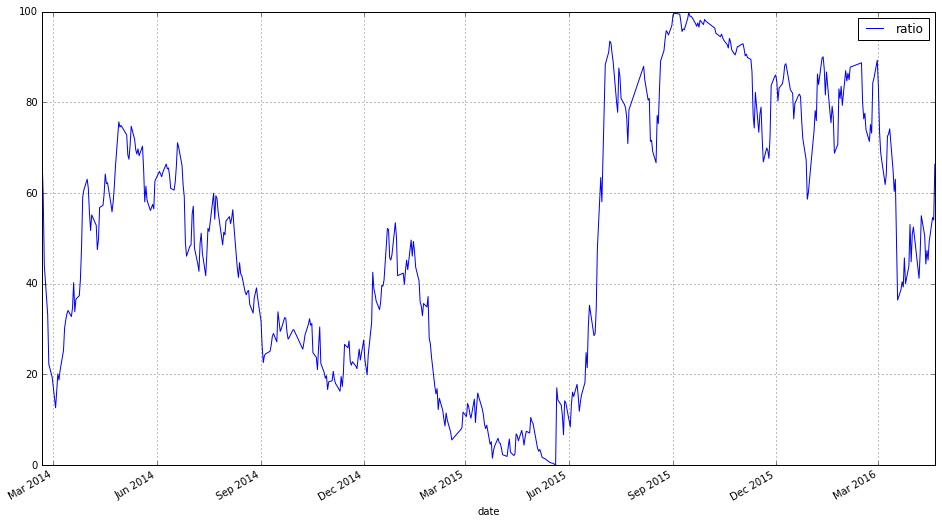

In [21]:
rat=pd.DataFrame([100-stats.percentileofscore(df.close,f) for f in df.close],index=df.index,columns=['ratio'])
rat.plot(grid=True,figsize=(16,9))

收盘价对比

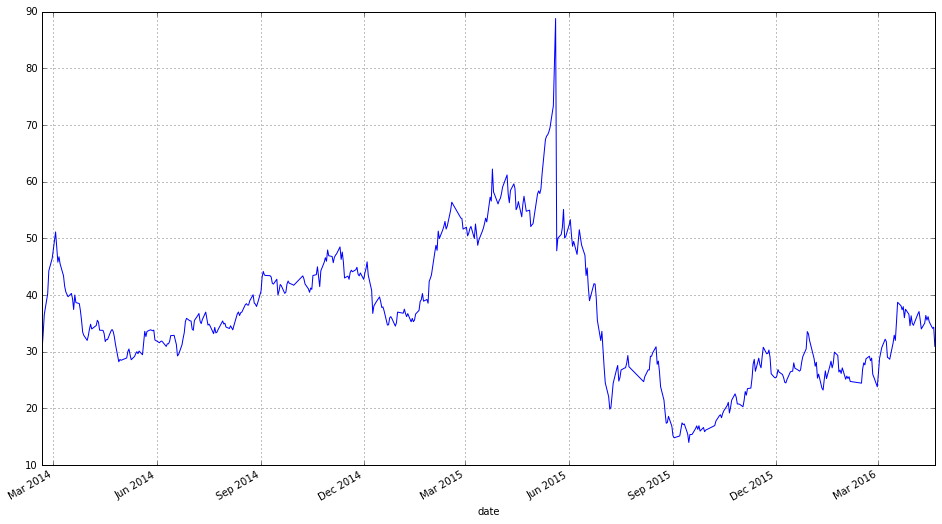

In [22]:
df.close.plot(grid=True,figsize=(16,9))

*三个月多阶段对比*

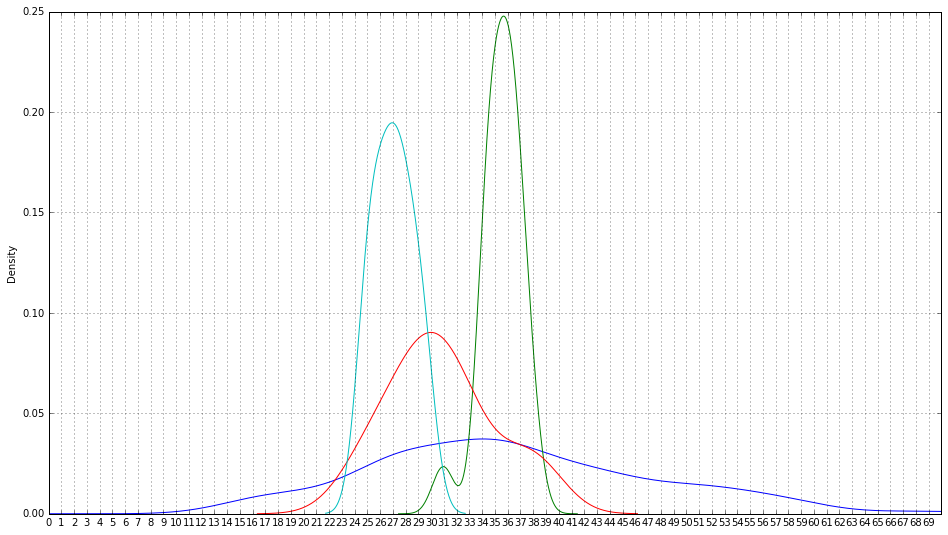

In [23]:
closeall40=df[20:40].close
closeall60=df[40:60].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9))
closeall40.plot(kind='kde',grid=True,figsize=(16,9))
closeall60.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)

In [24]:
closeall20.describe()

count    20.000000
mean     35.499500
std       1.551113
min      30.940000
25%      34.642500
50%      35.620000
75%      36.450000
max      37.950000
Name: close, dtype: float64

In [25]:
closeall40.describe()

count    20.00000
mean     30.81200
std       4.16509
min      23.82000
25%      28.78250
50%      30.29000
75%      32.38750
max      38.72000
Name: close, dtype: float64

In [26]:
closeall60.describe()

count    20.000000
mean     27.044000
std       1.608256
min      24.460000
25%      25.675000
50%      27.030000
75%      28.135000
max      29.930000
Name: close, dtype: float64

### 三年数据的换手率分析

最小值： 0.03
最大值： 67.17
平均值： 6.38801526718
标准差： 6.17548922608


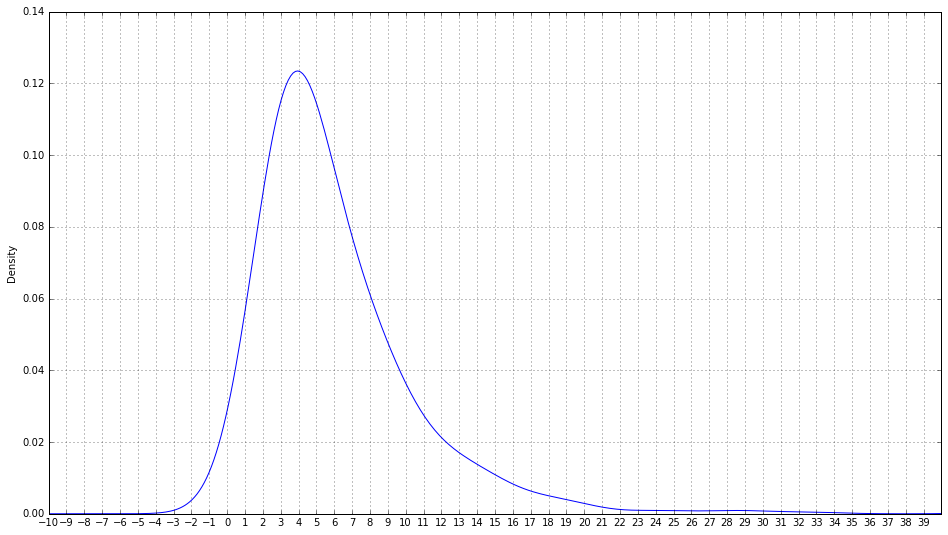

In [27]:
turnover=dp.turnover
txt=np.arange(-10,40,1)
txl=[-10,40]
turnover.plot(kind='kde',grid=True,figsize=(16,9),xticks=txt,xlim=txl)
print '最小值：',turnover.min()
print '最大值：',turnover.max()
print '平均值：',turnover.mean()
print '标准差：',turnover.std()

### 三年数据和全部数据的基本统计对比

- 三年数据：

In [28]:
dp.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,36.387347,37.563168,36.564599,35.390611,27674.057004,0.104828,0.324809,36.559916,36.567273,36.616643,27598.488111,27688.100496,28028.495668,6.388015
std,11.460902,11.780033,11.574720,11.128915,23442.058469,1.683331,4.908751,11.392637,11.245272,10.994048,20021.583392,18113.157039,17293.991584,6.175489
min,14.230000,15.400000,14.000000,13.980000,87.000000,-5.050000,-10.020000,15.154000,15.820000,16.020000,4551.830000,5885.510000,6812.460000,0.030000
25%,28.140000,29.400000,28.472500,27.187500,11864.490000,-0.875000,-2.482500,28.169500,27.917250,27.758750,12830.272500,13512.885000,13885.207500,3.247500
50%,35.185000,36.190000,35.205000,34.480000,20936.690000,0.185000,0.500000,35.414000,35.388500,35.123500,22427.265000,23391.280000,25183.545000,4.715000
75%,43.412500,44.325000,43.455000,42.335000,36964.225000,0.972500,2.837500,43.547500,43.076750,42.589000,37666.570000,38333.032500,38817.460000,7.832500
max,83.800000,88.810000,88.810000,80.440000,209623.390000,9.240000,44.000000,76.254000,70.517000,62.986000,162913.700000,113974.200000,97700.370000,67.170000


- 全部前复权数据：

In [29]:
df.describe()

,open,high,close,low,volume,amount
count,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,36.379981,37.558851,36.558084,35.380613,2778486.049808,9.755272e+07
std,11.411233,11.730432,11.522408,11.074639,2342402.420207,9.569618e+07
min,14.230000,15.400000,14.000000,13.980000,244741.000000,8.738151e+06
25%,28.180000,29.400000,28.515000,27.272500,1195662.750000,4.303967e+07
50%,35.180000,36.180000,35.205000,34.470000,2098701.000000,7.192930e+07
75%,43.365000,44.280000,43.440000,42.277500,3699267.500000,1.207048e+08
max,83.770000,88.770000,88.770000,80.410000,20962340.000000,9.429279e+08
